In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

In [2]:
def open_file(path='', eng=None, backed=False, key='', multiple=False, multiple_value=0.0, lat=0, lon=0):
    if backed==True:
        ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})
    else: ds = xr.open_dataset(path, engine=eng)
        
    gpi_bidim = ds.to_dataframe()

    # print and checks
    print(gpi_bidim)
    print(gpi_bidim.step.unique())
    print(gpi_bidim.number.unique())
    if 'isobaricInhPa' in gpi_bidim.columns: print(gpi_bidim.isobaricInhPa.unique())
    
    # reload and see number of data
    if backed==True:
        ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})
    else: ds = xr.open_dataset(path, engine=eng)
    gpi_bidim = ds.to_dataframe()
    gpi_bidim = gpi_bidim.reset_index()
    if multiple is False: 
        gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude',key]]
    else: 
        gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==multiple_value,['time','latitude','longitude',key]]

    res = gpi_bidim.groupby(['time']).count()
    print(res)
    print(res.loc[res[key]!=10512])
    
    # plot di un punto ogni giorno
    plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==lat) & (gpi_bidim.longitude==lon),key].reset_index(drop=True))
    
    # check 
    print(gpi_bidim.loc[(gpi_bidim.latitude==lat) & (gpi_bidim.longitude==lon),:])

In [3]:
def check_correct_lsm(dataset):
    print(dataset.head())

    lats = dataset.latitude.unique()
    lons = dataset.longitude.unique()
    
    print(len(lats), len(lons))
    
    check=0
    for lat in lats:
        for lon in lons:
            dummy_df = dataset.loc[(dataset.latitude==lat) & (dataset.longitude==lon)].sort_values('time',axis=0, ascending=True)
            #print(len(dummy_df))
            s = sum(abs(dummy_df.loc[:,'Real_tom_lsm'].iloc[:-1].values-dummy_df.loc[:,'lsm'].iloc[1:].values))
            if s>0: print('error') 
            #print(dummy_df.loc[1:,'lsm'].values)
#train.loc[(train.latitude==-17.5) & (train.longitude==85) & (train.time<='1980-12-31') & (train.lsm+train.Real_tom_lsm>=1)]


In [19]:
ds = xr.open_dataset('/Users/paolo/Desktop/tc_clim_obs_48_17_daily_smooth_0.25_1980_2022_2.5.grb', engine='cfgrib')


In [20]:
ds = ds.sel(latitude=slice(0,-30))
ds = ds.sel(longitude=slice(20,90))
df = ds.to_dataframe()

In [22]:
df = df.reset_index()

,time,latitude,longitude,number,step,surface,valid_time,p131089
0,1980-01-01,0.0,20.0,0,0 days,0.0,1980-01-01,0.000000
1,1980-01-01,0.0,22.5,0,0 days,0.0,1980-01-01,0.000000
2,1980-01-01,0.0,25.0,0,0 days,0.0,1980-01-01,0.000000
3,1980-01-01,0.0,27.5,0,0 days,0.0,1980-01-01,0.000000
4,1980-01-01,0.0,30.0,0,0 days,0.0,1980-01-01,0.000000
...,...,...,...,...,...,...,...,...
5921157,2022-12-31,-30.0,80.0,0,0 days,0.0,2022-12-31,0.003781
5921158,2022-12-31,-30.0,82.5,0,0 days,0.0,2022-12-31,0.002778
5921159,2022-12-31,-30.0,85.0,0,0 days,0.0,2022-12-31,0.008333
5921160,2022-12-31,-30.0,87.5,0,0 days,0.0,2022-12-31,0.005556


In [23]:
df.to_csv('clim_area_csv')

In [22]:
import numpy as np
ds.where(ds.time<pd.to_datetime('1990-01-01T00:00:00.000000000'))

<xarray.Dataset>
Dimensions:     (time: 15706, latitude: 73, longitude: 144)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude   (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    valid_time  (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
Data variables:
    p131089     (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-05-04T19:02 GRIB to CDM+CF via cfgrib-0.9.1...

# Original target

                               number   step  surface valid_time  lsm
time       latitude longitude                                        
1980-01-01  0.0     20.0            0 0 days      0.0 1980-01-01  0.0
                    22.5            0 0 days      0.0 1980-01-01  0.0
                    25.0            0 0 days      0.0 1980-01-01  0.0
                    27.5            0 0 days      0.0 1980-01-01  0.0
                    30.0            0 0 days      0.0 1980-01-01  0.0
...                               ...    ...      ...        ...  ...
1980-12-31 -30.0    80.0            0 0 days      0.0 1980-12-31  0.0
                    82.5            0 0 days      0.0 1980-12-31  0.0
                    85.0            0 0 days      0.0 1980-12-31  0.0
                    87.5            0 0 days      0.0 1980-12-31  0.0
                    90.0            0 0 days      0.0 1980-12-31  0.0

[137982 rows x 5 columns]
[0]
[0]
            latitude  longitude  lsm
time              

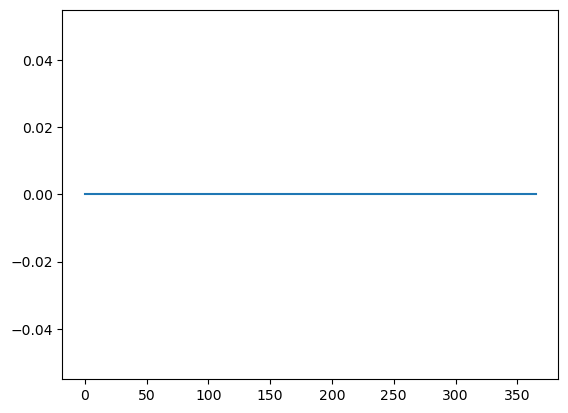

In [5]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/tcact_sin_year/actmask_hist_300km_17ms_sin_1980.grb", eng='cfgrib', backed=False, key='lsm', multiple=False, lon=30)


# New Target

                               number   step  surface valid_time  p131089
time       latitude longitude                                            
1980-01-01  90.0    -180.0          0 0 days      0.0 1980-01-01      0.0
                    -177.5          0 0 days      0.0 1980-01-01      0.0
                    -175.0          0 0 days      0.0 1980-01-01      0.0
                    -172.5          0 0 days      0.0 1980-01-01      0.0
                    -170.0          0 0 days      0.0 1980-01-01      0.0
...                               ...    ...      ...        ...      ...
1980-12-31 -90.0     167.5          0 0 days      0.0 1980-12-31      0.0
                     170.0          0 0 days      0.0 1980-12-31      0.0
                     172.5          0 0 days      0.0 1980-12-31      0.0
                     175.0          0 0 days      0.0 1980-12-31      0.0
                     177.5          0 0 days      0.0 1980-12-31      0.0

[3847392 rows x 5 columns]
[0]
[0]
  

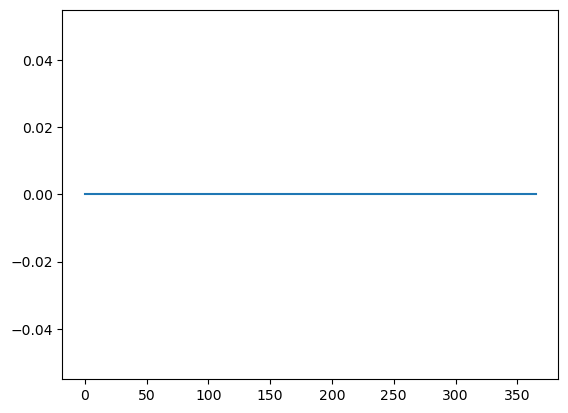

In [4]:
open_file(path="/Users/paolo/Desktop/TC_target/2.5col_obs_1980_48_17.grb", eng='cfgrib', backed=False, key='p131089', multiple=False, lon=20)


# Check old CSV

In [6]:
import pandas as pd

test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')

In [8]:
print(train.groupby(['latitude','longitude']).count()) #11.323 days 
print(val.groupby(['latitude','longitude']).count()) #1.826 days 
print(test.groupby(['latitude','longitude']).count()) #1.431 days 
# 377 rows, 8 input variables 

                    Unnamed: 0   time     vo      r  u_200  u_850  v_200  \
latitude longitude                                                         
-30.0    20.0            11323  11323  11323  11323  11323  11323  11323   
         22.5            11323  11323  11323  11323  11323  11323  11323   
         25.0            11323  11323  11323  11323  11323  11323  11323   
         27.5            11323  11323  11323  11323  11323  11323  11323   
         30.0            11323  11323  11323  11323  11323  11323  11323   
...                        ...    ...    ...    ...    ...    ...    ...   
 0.0     80.0            11323  11323  11323  11323  11323  11323  11323   
         82.5            11323  11323  11323  11323  11323  11323  11323   
         85.0            11323  11323  11323  11323  11323  11323  11323   
         87.5            11323  11323  11323  11323  11323  11323  11323   
         90.0            11323  11323  11323  11323  11323  11323  11323   

           

In [11]:
import pandas as pd

train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets.csv')
val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets.csv')
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets.csv')

In [108]:
print(train.groupby(['latitude','longitude']).count()) #11.323 days 
print(val.groupby(['latitude','longitude']).count()) #1.826 days 
print(test.groupby(['latitude','longitude']).count()) #1.431 days --> 2.527 days
# 377 rows, 8 input variables 

                    Unnamed: 0   time     vo      r  u_200  u_850  v_200  \
latitude longitude                                                         
-30.0    20.0            11323  11323  11323  11323  11323  11323  11323   
         22.5            11323  11323  11323  11323  11323  11323  11323   
         25.0            11323  11323  11323  11323  11323  11323  11323   
         27.5            11323  11323  11323  11323  11323  11323  11323   
         30.0            11323  11323  11323  11323  11323  11323  11323   
         32.5            11323  11323  11323  11323  11323  11323  11323   
         35.0            11323  11323  11323  11323  11323  11323  11323   
         37.5            11323  11323  11323  11323  11323  11323  11323   
         40.0            11323  11323  11323  11323  11323  11323  11323   
         42.5            11323  11323  11323  11323  11323  11323  11323   
         45.0            11323  11323  11323  11323  11323  11323  11323   
         47.

                    Unnamed: 0  time    vo     r  u_200  u_850  v_200  v_850  \
latitude longitude                                                             
-30.0    20.0             1826  1826  1826  1826   1826   1826   1826   1826   
         22.5             1826  1826  1826  1826   1826   1826   1826   1826   
         25.0             1826  1826  1826  1826   1826   1826   1826   1826   
         27.5             1826  1826  1826  1826   1826   1826   1826   1826   
         30.0             1826  1826  1826  1826   1826   1826   1826   1826   
         32.5             1826  1826  1826  1826   1826   1826   1826   1826   
         35.0             1826  1826  1826  1826   1826   1826   1826   1826   
         37.5             1826  1826  1826  1826   1826   1826   1826   1826   
         40.0             1826  1826  1826  1826   1826   1826   1826   1826   
         42.5             1826  1826  1826  1826   1826   1826   1826   1826   
         45.0             1826  1826  18

                    Unnamed: 0  time    vo     r  u_200  u_850  v_200  v_850  \
latitude longitude                                                             
-30.0    20.0             2527  2527  2527  2527   2527   2527   2527   2527   
         22.5             2527  2527  2527  2527   2527   2527   2527   2527   
         25.0             2527  2527  2527  2527   2527   2527   2527   2527   
         27.5             2527  2527  2527  2527   2527   2527   2527   2527   
         30.0             2527  2527  2527  2527   2527   2527   2527   2527   
         32.5             2527  2527  2527  2527   2527   2527   2527   2527   
         35.0             2527  2527  2527  2527   2527   2527   2527   2527   
         37.5             2527  2527  2527  2527   2527   2527   2527   2527   
         40.0             2527  2527  2527  2527   2527   2527   2527   2527   
         42.5             2527  2527  2527  2527   2527   2527   2527   2527   
         45.0             2527  2527  25

# Check target .nc

In [34]:
ds = xr.open_dataset("/Users/paolo/Documents/TC_old/data/data_new_samples/tcact_sin_year/actmask_hist_300km_17ms_sin_1980.grb", engine='cfgrib')
        
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
print(gpi_bidim.latitude.unique())
print(gpi_bidim.longitude.unique())

red_gpi_bidim_old = gpi_bidim.loc[(gpi_bidim.latitude>=-30) & (gpi_bidim.latitude<=0) & (gpi_bidim.longitude>=20) & (gpi_bidim.longitude<=90) & (gpi_bidim.lsm>0)]


[  0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30. ]
[20.  22.5 25.  27.5 30.  32.5 35.  37.5 40.  42.5 45.  47.5 50.  52.5
 55.  57.5 60.  62.5 65.  67.5 70.  72.5 75.  77.5 80.  82.5 85.  87.5
 90. ]


In [35]:
ds = xr.open_dataset("/Users/paolo/Desktop/TC_target/2.5col_obs_1980_48_17.grb", engine='cfgrib')
        
gpi_bidim = ds.to_dataframe().reset_index()
red_gpi_bidim = gpi_bidim.loc[(gpi_bidim.latitude>=-30) & (gpi_bidim.latitude<=0) & (gpi_bidim.longitude>=20) & (gpi_bidim.longitude<=90) & (gpi_bidim.p131089>0)]


In [41]:
red_gpi_bidim_old.loc[(red_gpi_bidim_old.latitude==-15) & (red_gpi_bidim_old.longitude==55)]

,time,latitude,longitude,number,step,surface,valid_time,lsm
26201,1980-03-10,-15.0,55.0,0,0 days,0.0,1980-03-10,1.0
26578,1980-03-11,-15.0,55.0,0,0 days,0.0,1980-03-11,1.0
26955,1980-03-12,-15.0,55.0,0,0 days,0.0,1980-03-12,1.0
29217,1980-03-18,-15.0,55.0,0,0 days,0.0,1980-03-18,1.0
29594,1980-03-19,-15.0,55.0,0,0 days,0.0,1980-03-19,1.0


In [42]:
red_gpi_bidim.loc[(red_gpi_bidim.latitude==-15) & (red_gpi_bidim.longitude==55)]

,time,latitude,longitude,number,step,surface,valid_time,p131089
636862,1980-03-01,-15.0,55.0,0,0 days,0.0,1980-03-01,16.0
647374,1980-03-02,-15.0,55.0,0,0 days,0.0,1980-03-02,16.5
657886,1980-03-03,-15.0,55.0,0,0 days,0.0,1980-03-03,16.5
720958,1980-03-09,-15.0,55.0,0,0 days,0.0,1980-03-09,77.0
731470,1980-03-10,-15.0,55.0,0,0 days,0.0,1980-03-10,100.0
741982,1980-03-11,-15.0,55.0,0,0 days,0.0,1980-03-11,100.0
752494,1980-03-12,-15.0,55.0,0,0 days,0.0,1980-03-12,97.0
794542,1980-03-16,-15.0,55.0,0,0 days,0.0,1980-03-16,0.5
805054,1980-03-17,-15.0,55.0,0,0 days,0.0,1980-03-17,100.0
815566,1980-03-18,-15.0,55.0,0,0 days,0.0,1980-03-18,100.0


# Check target .csv

In [122]:
import pandas as pd

train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')

In [60]:
train.head()

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,new_target,Real_tom_target
0,0,1980-01-01,0.0,20.0,0.000007,80.761185,1.909660,-3.323872,1.687164,-1.823624,-247.54074,0.0,0.0,0.0,0.0,0.0
1,1,1980-01-01,0.0,22.5,0.000004,80.703650,1.165733,-2.844494,1.060593,-1.991425,-240.00592,0.0,0.0,0.0,0.0,0.0
2,2,1980-01-01,0.0,25.0,0.000007,78.231514,-1.311676,-2.125244,3.280617,-1.931789,-223.76889,0.0,0.0,0.0,0.0,0.0
3,3,1980-01-01,0.0,27.5,0.000010,79.631010,-3.777573,-1.122395,5.743889,-1.243538,-235.55556,0.0,0.0,0.0,0.0,0.0
4,4,1980-01-01,0.0,30.0,0.000010,71.573875,-5.734505,-1.362953,6.514030,-0.954163,-254.03260,0.0,0.0,0.0,0.0,0.0


In [61]:
def check_correct_lsm(dataset):
    print(dataset.head())

    lats = dataset.latitude.unique()
    lons = dataset.longitude.unique()
    
    print(len(lats), len(lons))
    
    check=0
    for lat in lats:
        for lon in lons:
            dummy_df = dataset.loc[(dataset.latitude==lat) & (dataset.longitude==lon)].sort_values('time',axis=0, ascending=True)
            #print(len(dummy_df))
            s = sum(abs(dummy_df.loc[:,'Real_tom_target'].iloc[:-1].values-dummy_df.loc[:,'new_target'].iloc[1:].values))
            if s>0: 
                print(lat,lon)
                print(s) 
                #print(dummy_df.loc[1:,'lsm'].values)
                #print('error')
#train.loc[(train.latitude==-17.5) & (train.longitude==85) & (train.time<='1980-12-31') & (train.lsm+train.Real_tom_lsm>=1)]


In [123]:
#check_correct_lsm(train) 
#check_correct_lsm(val) 
check_correct_lsm(test) 
# ok

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  2016-01-01       0.0       20.0  0.000011  80.796135 -2.052292   
1           1  2016-01-01       0.0       22.5  0.000011  77.748420 -4.445312   
2           2  2016-01-01       0.0       25.0 -0.000001  71.178825 -3.778427   
3           3  2016-01-01       0.0       27.5 -0.000005  73.585754 -4.695709   
4           4  2016-01-01       0.0       30.0 -0.000016  72.382780 -4.002563   

      u_850     v_200     v_850        ttr  sst  new_target  Real_tom_target  
0  0.008678  4.996910 -1.678764 -272.04962  0.0         0.0              0.0  
1  0.740505  7.517281  0.792618 -250.63333  0.0         0.0              0.0  
2  1.056324  9.333221  0.688252 -229.52519  0.0         0.0              0.0  
3  1.236446  9.589882  0.555519 -240.80815  0.0         0.0              0.0  
4  0.734211  5.410950 -1.086350 -262.45557  0.0         0.0              0.0  
13 29


In [124]:
pd.set_option('display.max_rows', 500)

test.loc[(test.latitude==-15) & (test.longitude==45) & ((test.new_target!=0) | (test.Real_tom_target!=0))]

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,new_target,Real_tom_target
162294,24312,2017-03-06,-15.0,45.0,1.040549e-06,60.965477,-9.575249,-1.336498,4.235374,4.911522,-252.79741,303.03833,0.0,29.5
162671,24689,2017-03-07,-15.0,45.0,-6.713904e-06,71.835460,-8.037704,-0.608013,6.243286,7.224789,-193.45778,303.25912,29.5,29.5
163048,25066,2017-03-08,-15.0,45.0,-2.487196e-05,70.407875,-5.496826,8.275562,2.245453,6.816383,-155.27556,302.95737,29.5,0.0
437881,24689,2019-03-07,-15.0,45.0,3.535810e-06,73.838000,3.361855,5.465988,1.062103,-0.280121,-185.05463,302.66055,0.0,17.0
438258,25066,2019-03-08,-15.0,45.0,2.312033e-05,68.167854,10.022400,1.606232,3.727577,-2.029858,-191.75778,302.66520,17.0,40.0
438635,25443,2019-03-09,-15.0,45.0,5.008987e-06,73.579410,10.100220,3.474690,0.690361,-7.503574,-132.17871,302.58893,40.0,40.0
439012,25820,2019-03-10,-15.0,45.0,-7.581984e-06,81.306335,3.367783,6.871868,-0.566902,-11.792717,-131.89223,302.26846,40.0,33.0
439389,26197,2019-03-11,-15.0,45.0,-2.416960e-05,80.242490,2.652260,10.168278,-1.131226,-10.046047,-126.24556,302.10086,33.0,2.5
439766,26574,2019-03-12,-15.0,45.0,6.607806e-06,75.033190,-0.138840,6.860481,3.290878,-8.343723,-177.12315,302.33148,2.5,0.0
455223,42031,2019-04-22,-15.0,45.0,9.272932e-06,54.417946,3.017281,-4.406147,-3.104202,4.880634,-287.19110,302.79608,0.0,0.5


# Check .nc to .csv

In [65]:
# check features with file nc

import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt


def open_file(path='', eng=None, backed=False, key='', multiple=False, multiple_value=0.0, lat=0, lon=0):
    if backed==True:
        ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})
    else: ds = xr.open_dataset(path, engine=eng)
        
    gpi_bidim = ds.to_dataframe()

    # print and checks
    #print(gpi_bidim)
    #print(gpi_bidim.step.unique())
    #print(gpi_bidim.number.unique())
    #if 'isobaricInhPa' in gpi_bidim.columns: print(gpi_bidim.isobaricInhPa.unique())
    
    # reload and see number of data
    if backed==True:
        ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})
    else: ds = xr.open_dataset(path, engine=eng)
    gpi_bidim = ds.to_dataframe()
    gpi_bidim = gpi_bidim.reset_index()
    if multiple is False: 
        gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude',key]]
    else: 
        gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==multiple_value,['time','latitude','longitude',key]]

    res = gpi_bidim.groupby(['time']).count()
    #print(res)
    #print(res.loc[res[key]!=10512])
    
    # plot di un punto ogni giorno
    #plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==lat) & (gpi_bidim.longitude==lon),key].reset_index(drop=True))
    
    # check 
    return gpi_bidim.loc[(gpi_bidim.latitude==lat) & (gpi_bidim.longitude==lon),:]

In [81]:
lats = train.latitude.unique()
lons = train.longitude.unique()

for lat in lats:
    for lon in lons:
        dummy_df_true = open_file(path="/Users/paolo/Desktop/TC_target/2.5col_obs_2000_48_17.grb", eng='cfgrib', lat=lat, lon=lon, key='p131089')
        #dummy_df_true = dummy_df_true.loc[dummy_df_true.time<='2019-12-01']
        dummy_df = train.loc[(train.latitude==lat) & (train.longitude==lon) & (train.time<='2000-12-31') & (train.time>='2000-01-01')].sort_values('time',axis=0, ascending=True)
        s = (sum(abs(dummy_df['new_target'].values-dummy_df_true['p131089'].values)))
        if s > 10**(-9): 
            print(s)
        

In [87]:
lats = val.latitude.unique()
lons = val.longitude.unique()

for lat in lats:
    for lon in lons:
        dummy_df_true = open_file(path="/Users/paolo/Desktop/TC_target/2.5col_obs_2011_48_17.grb", eng='cfgrib', lat=lat, lon=lon, key='p131089')
        #dummy_df_true = dummy_df_true.loc[dummy_df_true.time<='2019-12-01']
        dummy_df = val.loc[(val.latitude==lat) & (val.longitude==lon) & (val.time<='2011-12-31') & (val.time>='2011-01-01')].sort_values('time',axis=0, ascending=True)
        s = (sum(abs(dummy_df['new_target'].values-dummy_df_true['p131089'].values)))
        if s > 10**(-9): 
            print(s)
        

In [88]:
lats = val.latitude.unique()
lons = val.longitude.unique()

for lat in lats:
    for lon in lons:
        dummy_df_true = open_file(path="/Users/paolo/Desktop/TC_target/2.5col_obs_2014_48_17.grb", eng='cfgrib', lat=lat, lon=lon, key='p131089')
        #dummy_df_true = dummy_df_true.loc[dummy_df_true.time<='2019-12-01']
        dummy_df = val.loc[(val.latitude==lat) & (val.longitude==lon) & (val.time<='2014-12-31') & (val.time>='2014-01-01')].sort_values('time',axis=0, ascending=True)
        s = (sum(abs(dummy_df['new_target'].values-dummy_df_true['p131089'].values)))
        if s > 10**(-9): 
            print(s)
        

In [125]:
lats = test.latitude.unique()
lons = test.longitude.unique()

for lat in lats:
    for lon in lons:
        dummy_df_true = open_file(path="/Users/paolo/Desktop/TC_target/2.5col_obs_2019_48_17.grb", eng='cfgrib', lat=lat, lon=lon, key='p131089')
        #dummy_df_true = dummy_df_true.loc[dummy_df_true.time<='2019-12-01']
        dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2019-12-31') & (test.time>='2019-01-01')].sort_values('time',axis=0, ascending=True)
        s = (sum(abs(dummy_df['new_target'].values-dummy_df_true['p131089'].values)))
        if s > 10**(-9): 
            print(s)
        

In [126]:
lats = test.latitude.unique()
lons = test.longitude.unique()

for lat in lats:
    for lon in lons:
        dummy_df_true = open_file(path="/Users/paolo/Desktop/TC_target/2.5col_obs_2022_48_17.grb", eng='cfgrib', lat=lat, lon=lon, key='p131089')
        #dummy_df_true = dummy_df_true.loc[dummy_df_true.time<='2019-12-01']
        dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2022-12-31') & (test.time>='2022-01-01')].sort_values('time',axis=0, ascending=True)
        s = (sum(abs(dummy_df['new_target'].values-dummy_df_true['p131089'].values)))
        if s > 10**(-9): 
            print(s)
        

In [90]:
test_old = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
train_old = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
val_old = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')

In [92]:
for lat in lats:
    for lon in lons:
        dummy_df = val.loc[(val.latitude==lat) & (val.longitude==lon)].sort_values('time',axis=0, ascending=True)
        dummy_df_old = val.loc[(val.latitude==lat) & (val.longitude==lon)].sort_values('time',axis=0, ascending=True)
        s = (sum(abs(dummy_df['vo'].values-dummy_df_old['vo'].values)))
        if s>0: print(s)
        if s<0: print(s)

In [111]:
for variable in ['r','vo','sst','ttr','u_200','u_850','v_200','v_850']:
    for lat in lats:
        for lon in lons:
            dummy_df = val.loc[(val.latitude==lat) & (val.longitude==lon)].sort_values('time',axis=0, ascending=True)
            dummy_df_old = val_old.loc[(val_old.latitude==lat) & (val_old.longitude==lon)].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_old[variable].values)))
            if s > 10**(-9): print(s)
            if s < -10**(-9): print(s)

In [112]:
for variable in ['r','vo','sst','ttr','u_200','u_850','v_200','v_850']:
    for lat in lats:
        for lon in lons:
            dummy_df = train.loc[(train.latitude==lat) & (train.longitude==lon)].sort_values('time',axis=0, ascending=True)
            dummy_df_old = train_old.loc[(train_old.latitude==lat) & (train_old.longitude==lon)].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_old[variable].values)))
            if s > 10**(-9): print(s)
            if s < -10**(-9): print(s)

In [127]:
### test
for variable in ['r','vo','sst','ttr','u_200','u_850','v_200','v_850']:
    for lat in lats:
        for lon in lons:
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon)].sort_values('time',axis=0, ascending=True)
            dummy_df = dummy_df.loc[dummy_df.time<='2019-12-01']
            dummy_df_old = test_old.loc[(test_old.latitude==lat) & (test_old.longitude==lon)].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_old[variable].values)))
            if s > 10**(-9): print(s)
            if s < -10**(-9): print(s)

In [140]:
for variable in ['r','vo']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/20190101_20191231.grb", eng='cfgrib', backed=True, key=variable, lat=lat, lon=lon)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2019-12-31') & (test.time>='2019-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


r




KeyboardInterrupt: 

In [143]:
for variable in ['r','vo']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Desktop/2d_gpi_20220101_20221231.grb", eng='cfgrib', backed=True, key=variable, lat=lat, lon=lon)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2022-12-31') & (test.time>='2022-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


r


vo




In [144]:
for variable in ['u','v']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/20190101_20191231.grb", eng='cfgrib', backed=True, key=variable, multiple=True, multiple_value=200.0)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2019-12-31') & (test.time>='2019-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable+'_200'].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


u


v




In [145]:
for variable in ['u','v']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/20190101_20191231.grb", eng='cfgrib', backed=True, key=variable, multiple=True, multiple_value=850.0)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2019-12-31') & (test.time>='2019-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable+'_850'].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


u


v




In [147]:
for variable in ['u','v']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Desktop/2d_gpi_20220101_20221231.grb", eng='cfgrib', backed=True, key=variable, multiple=True, multiple_value=200.0)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2022-12-31') & (test.time>='2022-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable+'_200'].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


u


v




In [148]:
for variable in ['u','v']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Desktop/2d_gpi_20220101_20221231.grb", eng='cfgrib', backed=True, key=variable, multiple=True, multiple_value=850.0)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2019-12-31') & (test.time>='2019-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable+'_850'].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


u


v




In [161]:
for variable in ['sst']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/2d_sst_trop_20190101_20191231.grb", eng='cfgrib', backed=False, key=variable, lat=lat, lon=lon)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2019-12-31') & (test.time>='2019-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


sst




In [163]:
for variable in ['sst']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Desktop/2d_sst_trop_20220101_20221231.grb", eng='cfgrib', backed=False, key=variable, lat=lat, lon=lon)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2022-12-31') & (test.time>='2022-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


sst




In [165]:
for variable in ['ttr']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/an_20190101_20191231_25.grb", eng='cfgrib', backed=False, key=variable, lat=lat, lon=lon)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2019-12-31') & (test.time>='2019-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


ttr




In [167]:
for variable in ['ttr']:
    print(variable+'\n\n')
    for lat in lats:
        for lon in lons:
            dummy_df_true = open_file(path="/Users/paolo/Desktop/an_20220101_20221231_25.grb", eng='cfgrib', backed=False, key=variable, lat=lat, lon=lon)
            dummy_df = test.loc[(test.latitude==lat) & (test.longitude==lon) & (test.time<='2022-12-31') & (test.time>='2022-01-01')].sort_values('time',axis=0, ascending=True)
            s = (sum(abs(dummy_df[variable].values-dummy_df_true[variable].values)))
            if ((variable=='vo') & (s > 10**(-9))): print(s)
            if ((variable=='r') & (s > 10**(-3))): print(s)
            if ((variable=='u_850') & (s > 10**(-4))): print(s)
            if ((variable=='v_850') & (s > 10**(-3))): print(s)
            if ((variable=='u_200') & (s > 10**(-3))): print(s)
            if ((variable=='v_200') & (s > 10**(-3))): print(s)
            if ((variable=='sst') & (s > 10**(-2))): print(s)
            if ((variable=='ttr') & (s > 10**(-2))): print(s)


ttr




In [14]:
ds = xr.open_dataset("/Users/paolo/Desktop/2.5_lsm.grb", engine='cfgrib')
        
mask = ds.to_dataframe().reset_index()
mask = mask.loc[(mask.latitude<=0) & (mask.latitude>=-30) & (mask.longitude>=20) & (mask.longitude<=90)]


In [18]:
mask.loc[mask.lsm==1].to_csv('sea_mask.csv')